# COMP534 - Assignment 1 (Binary Classification)
<span style="color:black"></span>

## Dataset
<span style="color:black"></span>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_theme(style="ticks")

C:\Users\steph\AppData\Local\Temp\ipykernel_14408\2574074622.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
# Load dataset
data = pd.read_csv(r"C:\Users\steph\OneDrive\Documents\Semester 2\COMP534 - Applied AI\Assignment 1\dataset_assignment1.csv")

## Exploratory Data Analysis
<span style="color:black"></span>

In [7]:
# Inspect general structure of dataset
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [8]:
# Print dataset information
print("Dataset Information:")
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB


In [9]:
# Print out the number of samples for each class in the dataset
class_counts = data["class"].value_counts()
print("Number of samples for each class:")
print(class_counts)

Number of samples for each class:
class
0    459
1    241
Name: count, dtype: int64


Text(0.5, 0.98, 'Histograms of Features')

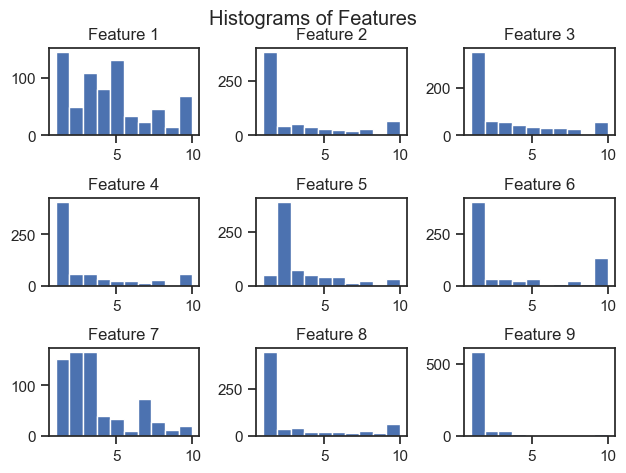

In [10]:
# Histogram subplot for the nine features arranged in a 3x3 grid layout
fig, axs = plt.subplots(3, 3)
axs[0,0].hist(data["feature1"], bins=10);
axs[0,0].set_title("Feature 1")
axs[0,1].hist(data["feature2"], bins=10);
axs[0,1].set_title("Feature 2")
axs[0,2].hist(data["feature3"], bins=10);
axs[0,2].set_title("Feature 3")
axs[1,0].hist(data["feature4"], bins=10);
axs[1,0].set_title("Feature 4")
axs[1,1].hist(data["feature5"], bins=10);
axs[1,1].set_title("Feature 5")
axs[1,2].hist(data["feature6"], bins=10);
axs[1,2].set_title("Feature 6")
axs[2,0].hist(data["feature7"], bins=10);
axs[2,0].set_title("Feature 7")
axs[2,1].hist(data["feature8"], bins=10);
axs[2,1].set_title("Feature 8")
axs[2,2].hist(data["feature9"], bins=10);
axs[2,2].set_title("Feature 9")

# Add some spacing between subplots
fig.tight_layout(pad=1.0);

# Adjust the position of the title
plt.subplots_adjust(top=0.9)

fig.suptitle("Histograms of Features")

For features 2-6 and 8-9, there appears to be a group of data points that have smaller values than the others, suggesting that there may be various groups in this data.

Text(0.5, 0.98, 'Comparison of Feature Distributions Across Classes')

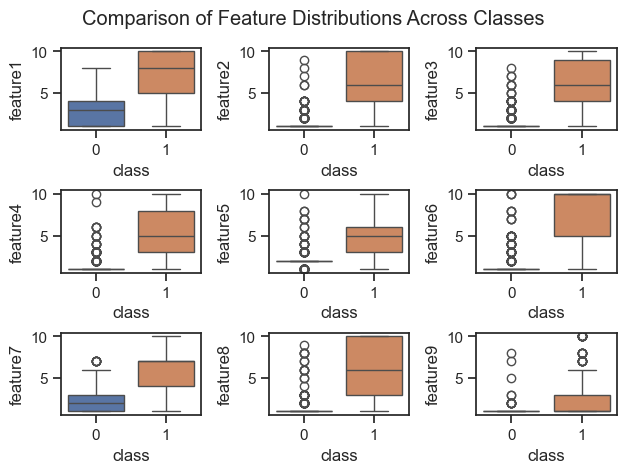

In [64]:
# Side-by-side box plots arranged in a 3x3 grid layout
fig, axs = plt.subplots(3, 3)
fn = ["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "feature8", "feature9"]
cn = [0, 1]
sns.boxplot(x="class", y="feature1", data=data, hue="class", order=cn, ax=axs[0,0], legend=False);
sns.boxplot(x="class", y="feature2", data=data, hue="class", order=cn, ax=axs[0,1], legend=False);
sns.boxplot(x="class", y="feature3", data=data, hue="class", order=cn, ax=axs[0,2], legend=False);
sns.boxplot(x="class", y="feature4", data=data, hue="class", order=cn, ax=axs[1,0], legend=False);
sns.boxplot(x="class", y="feature5", data=data, hue="class", order=cn, ax=axs[1,1], legend=False);
sns.boxplot(x="class", y="feature6", data=data, hue="class", order=cn, ax=axs[1,2], legend=False);
sns.boxplot(x="class", y="feature7", data=data, hue="class", order=cn, ax=axs[2,0], legend=False);
sns.boxplot(x="class", y="feature8", data=data, hue="class", order=cn, ax=axs[2,1], legend=False);
sns.boxplot(x="class", y="feature9", data=data, hue="class", order=cn, ax=axs[2,2], legend=False);

# Add some spacing between supblots
fig.tight_layout(pad=1.0);

# Adjust the position of the title
plt.subplots_adjust(top=0.9)

fig.suptitle("Comparison of Feature Distributions Across Classes")

The side-by-side box plots for features 2-6 and 8-9 suggest that the group of data points that were smaller in the histogram plots are class 0.

Text(0.5, 1.02, 'Pairwise Scatter Plots of Features (Colored by Class)')

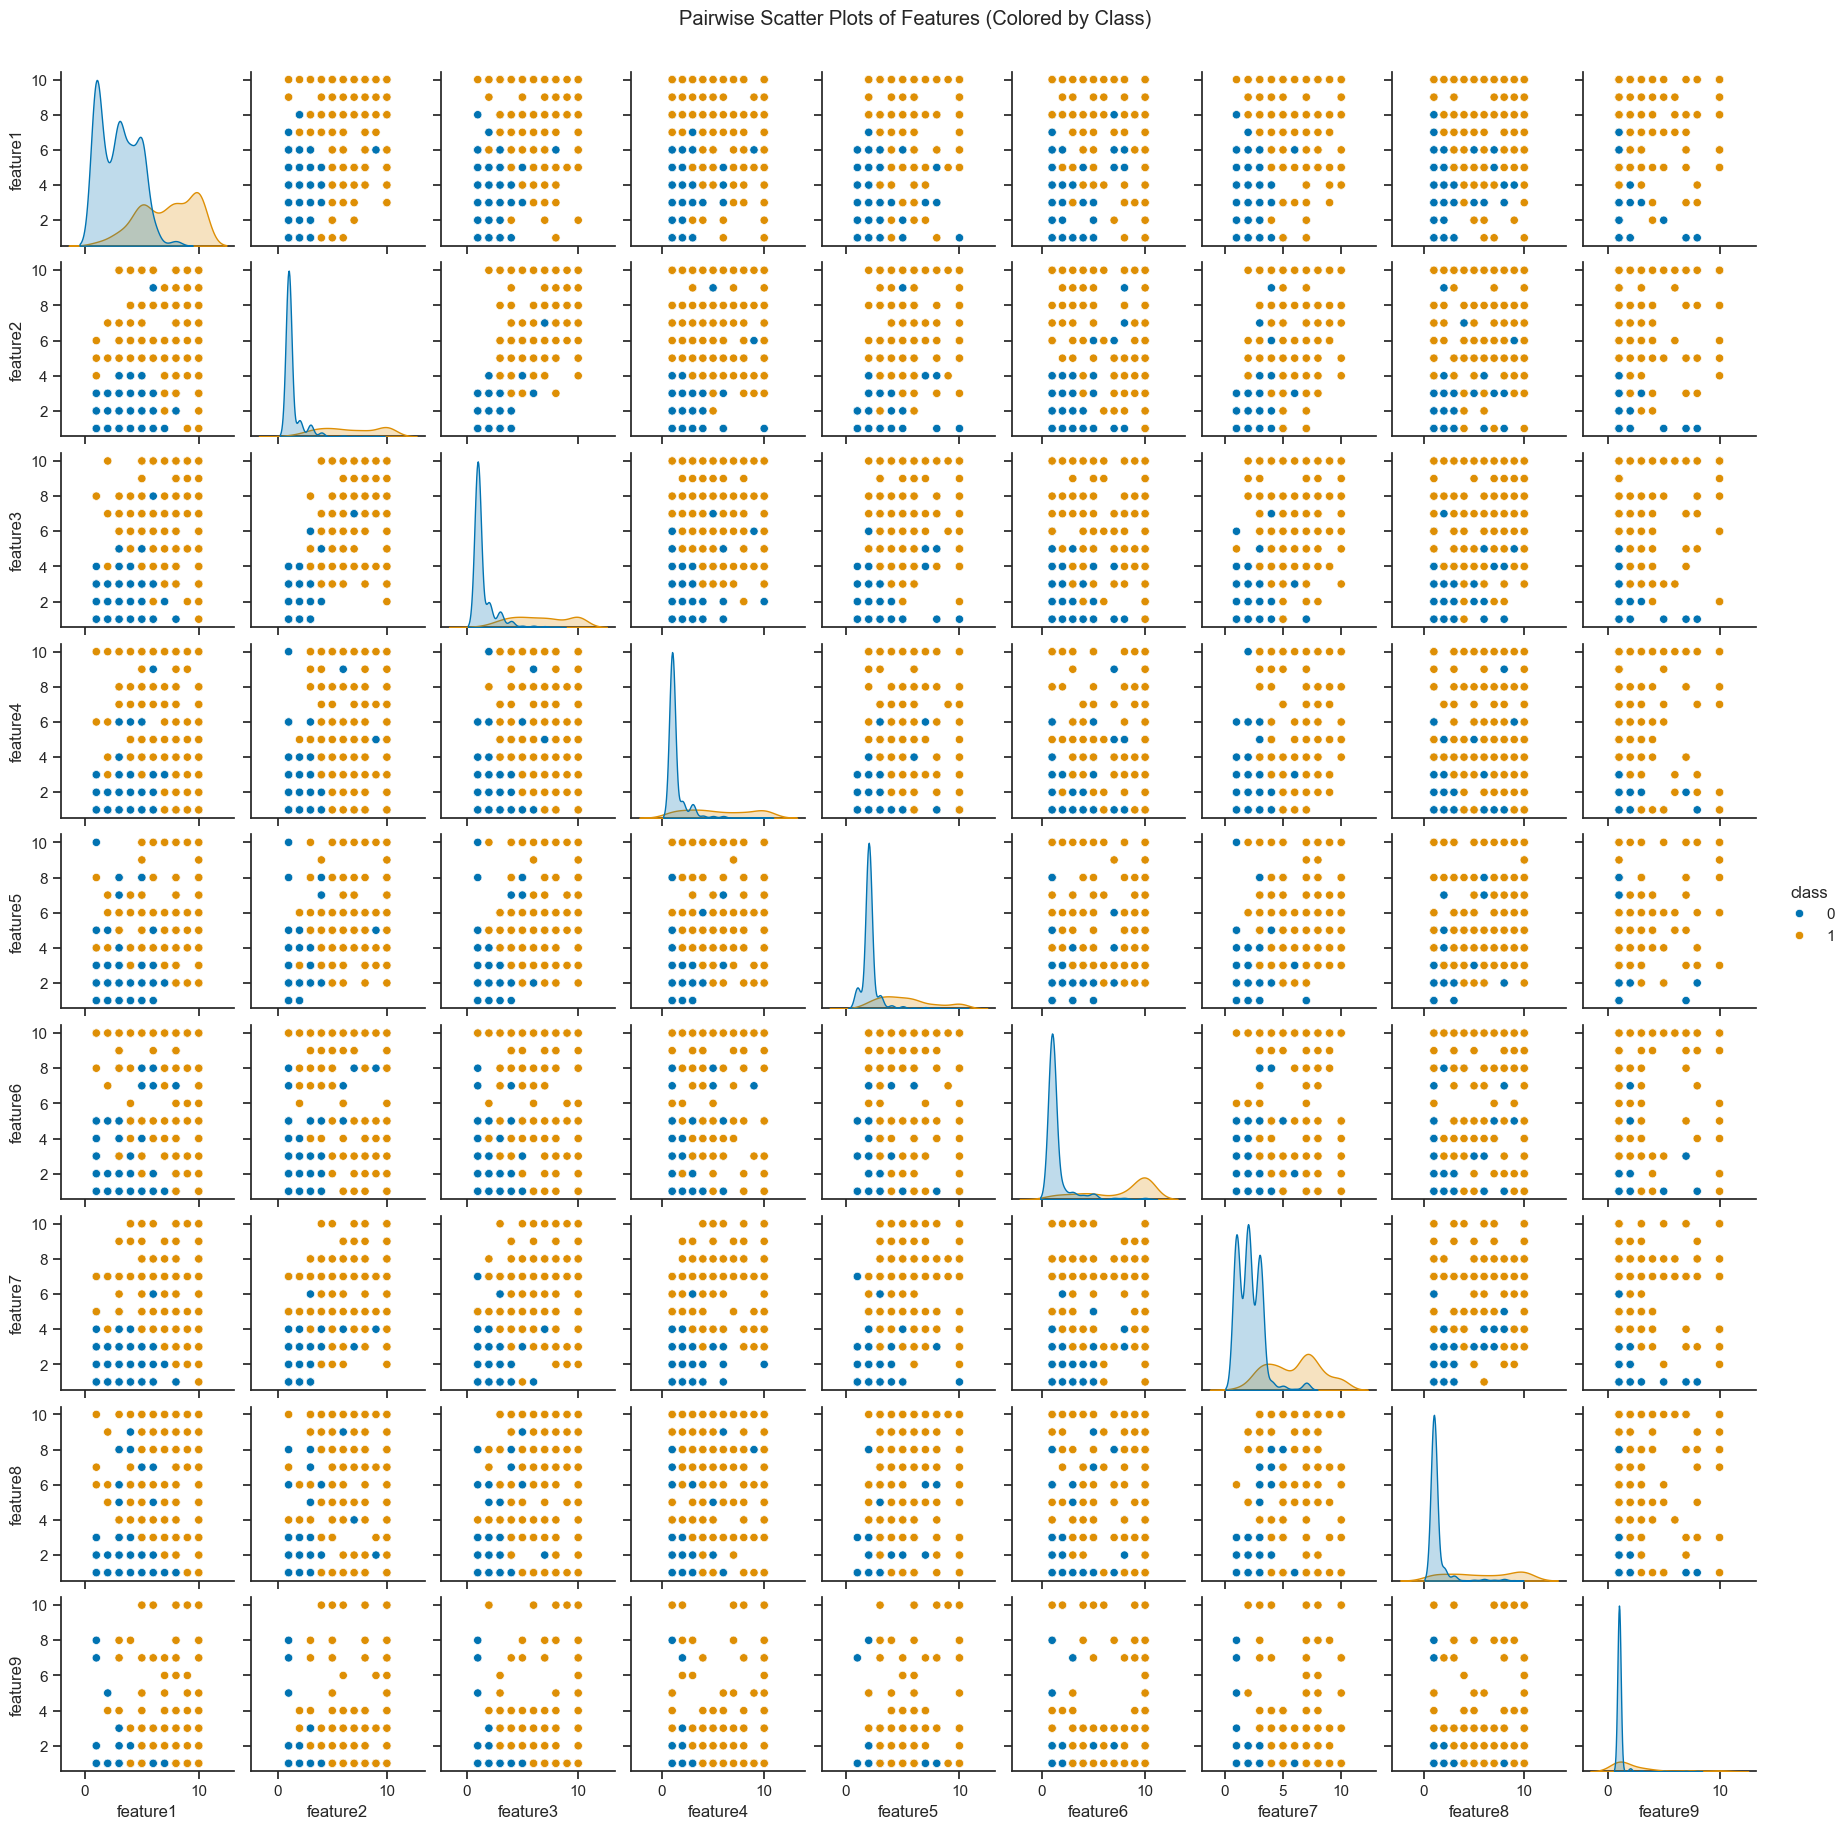

In [12]:
# Scatterplots of all-paired attributes
sns.pairplot(data, hue="class", height=2, palette="colorblind")
plt.suptitle("Pairwise Scatter Plots of Features (Colored by Class)", y=1.02)

The variables do not appear to be highly correlated. In addition, features 1 and 7 do not separate the different classes as well as the other features.

<Axes: >

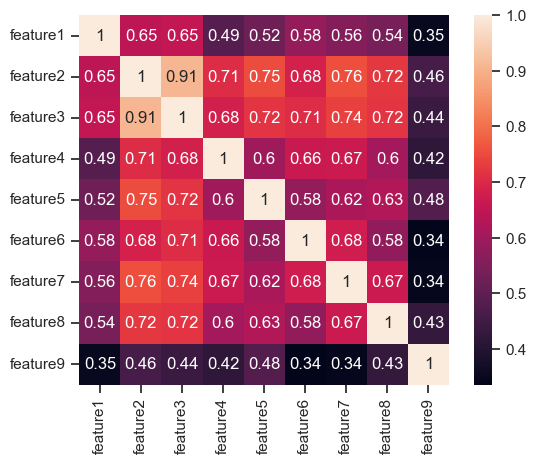

In [13]:
# Correlation Matrix to examine relationships between variables
corrmat = data.drop("class", axis=1).corr()
sns.heatmap(corrmat, annot=True, square=True)

The main observation is that feature 2 and feature 3 have highly positive correlation.

In [14]:
from pandas.plotting import parallel_coordinates

Text(0.5, 1.0, 'Parallel Coordinate Plot')

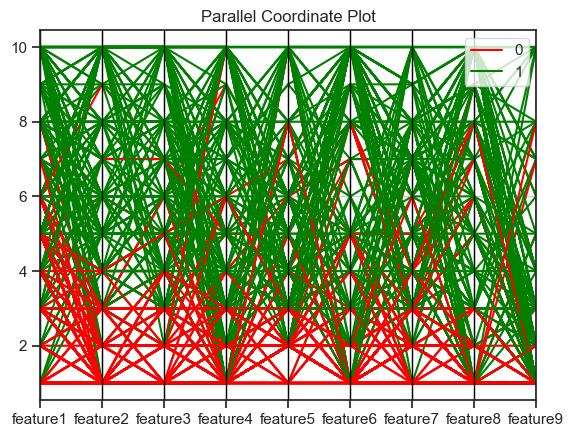

In [15]:
# Parallel Coordinate Plot to represent each sample as a line
parallel_coordinates(data, "class", color=["red", "green"])
plt.title("Parallel Coordinate Plot")

In [16]:
# Print out the statistical description of features for each class

# Group the data by the target variable
grouped_by_class = data.groupby("class")

# Iterate through each class
for class_label, class_data in grouped_by_class:
    # Print the statistical description for each class
    print(f"Class {class_label} Statistical Description:")
    print(class_data.describe())
    print("\n")

Class 0 Statistical Description:
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8    feature9  class  
count  459.000000  459.000000  459.000000  459.0  
mean     2.102397    1.289760    1.063181    0.0  
std      1.079976    1.057787    0.501456    0.0  
min      1.000000    1.000000    

## Splitting dataset into training and testing data
<span style="color: black;"></span>

In [17]:
# Separate data into independent variables (feature) and dependent (target) variable
X = data.iloc[:, 0:9] # feature variables
y = data.iloc[:, 9] # target variable

In [18]:
# Print feature variables DataFrame
print(f"X:{X}")
print("\n")
print(f"Shape of X: {X.shape}")

X:     feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0           5         1         1         1         2         1         3   
1           5         4         4         5         7        10         3   
2           3         1         1         1         2         2         3   
3           6         8         8         1         3         4         3   
4           4         1         1         3         2         1         3   
..        ...       ...       ...       ...       ...       ...       ...   
695         2         1         1         1         2         1         1   
696         5        10        10         3         7         3         8   
697         4         8         6         4         3         4        10   
698         4         8         8         5         4         5        10   
699         3         1         1         1         2         1         3   

     feature8  feature9  
0           1         1  
1           2        

In [19]:
# Print target variable DataFrame
print(y)
print("\n")
print(f"Shape of y: {y.shape}")

0      0
1      0
2      0
3      0
4      0
      ..
695    0
696    1
697    1
698    1
699    0
Name: class, Length: 700, dtype: int64


Shape of y: (700,)


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Randomly split dataset into 80% training data and 20% testing data
# Use target variable for stratification and random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (560, 9)
Shape of X_test: (140, 9)
Shape of y_train: (560,)
Shape of y_test: (140,)


## Random Forest Classifier
<span style="color:black"></span>

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Define the Random Forest Classifier model
rf = RandomForestClassifier()

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [52]:
# 5-Fold Cross Validation
cv1 = KFold(n_splits=5)

# Define the parameter grid
rf_param_grid = [
    {
        "n_estimators": [500, 1000, 1500],  # Number of trees in the forest
        "max_depth": [None, 10, 20, 30],  # Max number of levels in each tree
        "max_features": ["sqrt", "log2", None],  # Max features for splitting a node
    }
]

# Instantiate GridSearchCV with multiple scoring metrics
scoring_metrics = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score)
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=cv1, scoring=scoring_metrics, refit="accuracy")

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_rf_params = grid_search_rf.best_params_

# Get the index of the best estimator
best_index_rf = grid_search_rf.best_index_

# Print the best parameters and their corresponding scores for each metric
print(f"Best hyperparameter combination: {best_rf_params}")
print("Best accuracy: ", grid_search_rf.cv_results_['mean_test_accuracy'][best_index_rf])
print("Best precision: ", grid_search_rf.cv_results_['mean_test_precision'][best_index_rf])
print("Best recall: ", grid_search_rf.cv_results_['mean_test_recall'][best_index_rf])
print("Best F1-score: ", grid_search_rf.cv_results_['mean_test_f1'][best_index_rf])

Best hyperparameter combination: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1500}
Best accuracy:  0.9714285714285715
Best precision:  0.9499997758259692
Best recall:  0.9683454130822552
Best F1-score:  0.9589258799613034


In [53]:
# Train the model with the best hyperparameters
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1500)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
# Calculate accuracy on the training data
rf_train_accuracy = accuracy_score(y_train, best_rf.predict(X_train))
print("Training Accuracy:", rf_train_accuracy)

Training Accuracy: 1.0


In [56]:
# Test the best version of the model on the testing dataset
y_pred_rf = best_rf.predict(X_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

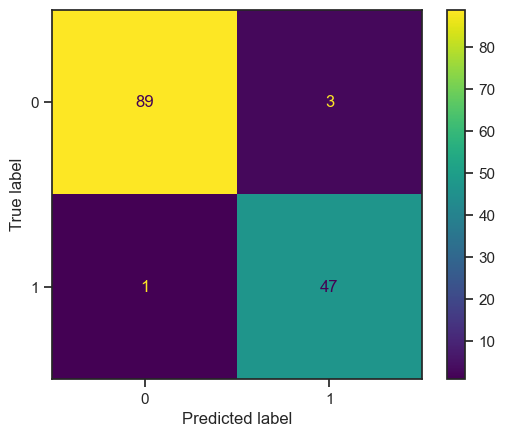

In [58]:
# Plot Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_display = ConfusionMatrixDisplay(cm_rf).plot()

In [59]:
# Evaluate performance of model on test set
print(accuracy_score(y_test, y_pred_rf))

0.9714285714285714


In [60]:
# Report performance of algorithm
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        92
           1       0.94      0.98      0.96        48

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



## KNN Classifier
<span style="color:black"></span>

In [34]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [35]:
# Define the KNN Classifier model
knn = KNeighborsClassifier()

In [36]:
# 5-Fold Cross Validation
cv2 = KFold(n_splits=5)

# Define parameter grid
knn_param_grid = {"n_neighbors": np.arange(1, 31)}  # Explore k-values from 1 to 30

# Instantiate GridSearchCV with multiple scoring metrics
scoring_metrics = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score)
}

grid_search_knn = GridSearchCV(knn, knn_param_grid, cv=cv2, scoring=scoring_metrics, refit="accuracy")

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters
best_k = grid_search_knn.best_params_["n_neighbors"]

# Get the index of the best estimator
best_index_knn = grid_search_knn.best_index_

# Print the best parameters and their corresponding scores for each metric
print(f"Best k-value: {best_k}")
print("Best accuracy:", grid_search_knn.cv_results_['mean_test_accuracy'][best_index_knn])
print("Best precision:", grid_search_knn.cv_results_['mean_test_precision'][best_index_knn])
print("Best recall:", grid_search_knn.cv_results_['mean_test_recall'][best_index_knn])
print("Best F1-score:", grid_search_knn.cv_results_['mean_test_f1'][best_index_knn])

Best k-value: 3
Best accuracy: 0.975
Best precision: 0.950954712362301
Best recall: 0.9788717288717288
Best F1-score: 0.9644338209379484


In [37]:
# Train the model with the best hyperparameters
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
# Calculate accuracy on the training data
train_accuracy = accuracy_score(y_train, best_knn.predict(X_train))
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9875


In [39]:
# Test the best model on the testing dataset
y_pred_knn = best_knn.predict(X_test)

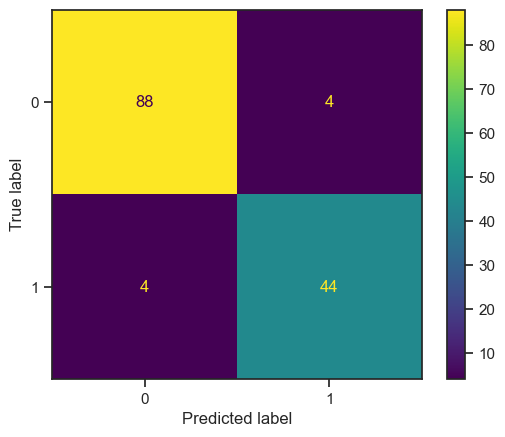

In [40]:
# Plot Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_display = ConfusionMatrixDisplay(cm_knn).plot()

In [41]:
# Evaluate performance of model on test set
print(accuracy_score(y_test, y_pred_knn))

0.9428571428571428


In [42]:
# Report performance of algorithm
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        92
           1       0.92      0.92      0.92        48

    accuracy                           0.94       140
   macro avg       0.94      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



## Logistic Regression
<span style="color:black"></span>

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
# Define the Logistic Regression Classifier model
lr = LogisticRegression()

In [45]:
# Define parameters
solvers = ["newton-cg", "lbfgs", "liblinear"]
penalty = ["l2"]
C_values = np.logspace(-4, 4, 10)

# Define parameter grid
lr_param_grid = {"solver" : solvers,
                 "penalty" : penalty,
                 "C" : C_values}

cv3 = KFold(n_splits=5)

# Instantiate GridSearchCV with multiple scoring metrics
scoring_metrics = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score)
}

grid_search_lr = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=cv3, scoring=scoring_metrics, refit="accuracy")

# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters
best_lr_params = grid_search_lr.best_params_

# Get the index of the best estimator
best_index_lr = grid_search_lr.best_index_

# Print the best parameters and their corresponding scores for each metric
print(f"Best hyperparameter combination: {best_lr_params}")
print("Best accuracy: ", grid_search_lr.cv_results_['mean_test_accuracy'][best_index_lr])
print("Best precision: ", grid_search_lr.cv_results_['mean_test_precision'][best_index_lr])
print("Best recall: ", grid_search_lr.cv_results_['mean_test_recall'][best_index_lr])
print("Best F1-score: ", grid_search_lr.cv_results_['mean_test_f1'][best_index_lr])

Best hyperparameter combination: {'C': 0.3593813663804626, 'penalty': 'l2', 'solver': 'newton-cg'}
Best accuracy:  0.9696428571428571
Best precision:  0.9581926203877422
Best recall:  0.9525346022714445
Best F1-score:  0.9552009574511311


In [46]:
# Train the model with the best hyperparameters
best_lr = LogisticRegression(**best_lr_params)
best_lr.fit(X_train, y_train)

LogisticRegression(C=0.3593813663804626, solver='newton-cg')

In [47]:
# Calculate accuracy on the training data
lr_train_accuracy = accuracy_score(y_train, best_lr.predict(X_train))
print("Training Accuracy:", lr_train_accuracy)

Training Accuracy: 0.9714285714285714


In [48]:
# Test the best model on the testing dataset
y_pred_lr = best_lr.predict(X_test)

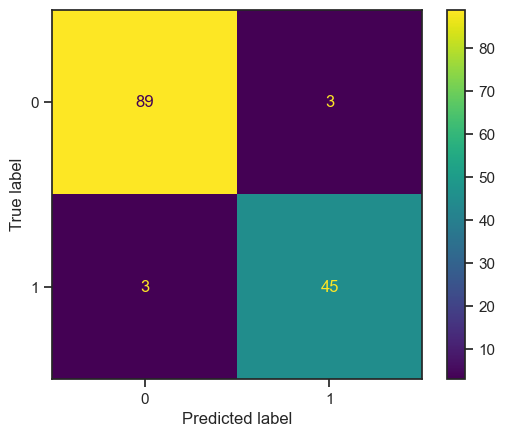

In [49]:
# Plot Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_display = ConfusionMatrixDisplay(cm_lr).plot()

In [50]:
# Evaluate performance of model on test set
print(accuracy_score(y_test, y_pred_lr))

0.9571428571428572


In [51]:
# Report performance of algorithm
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        92
           1       0.94      0.94      0.94        48

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

